[View in Colaboratory](https://colab.research.google.com/github/SravyaSpandana/Complaints_Framework/blob/master/Complaints_Framework_Model_Sravya_City_MatPlot.ipynb)

In [0]:
# IMPORTING NECESSARY PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [9]:
data = pd.read_csv("drive/Complaints_Dataset/complaints-2018-08-19_Cities.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Complaint ID,City,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,02-05-13,Mortgage,FHA mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,"BAYVIEW LOAN SERVICING, LLC",MA,2151,...,301664,Revere,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/15/17,Mortgage,Other type of mortgage,Trouble during payment process,NaN,NaN,Company has responded to the consumer and the ...,BMO HARRIS BANK NATIONAL ASSOCIATION,IL,60165,...,2484441,Stone Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,09/24/14,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,Ditech Financial LLC,FL,34209,...,1043621,Bradenton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11-06-15,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,OCWEN LOAN SERVICING LLC,GA,30253,...,1643449,Mcdonough,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,03-08-12,Mortgage,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"CITIBANK, N.A.",NJ,7438,...,32218,Oak Ridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
data = data[data.Company == 'WELLS FARGO & COMPANY']

In [12]:
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Complaint ID,City,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
13,12-05-16,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,NJ,7106,...,2236348,Newark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,01-09-13,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,WELLS FARGO & COMPANY,NY,11550,...,225262,Hempstead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,06-02-14,Mortgage,Other mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,WELLS FARGO & COMPANY,VA,20109,...,876185,Manassas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,03/18/14,Mortgage,Reverse mortgage,Settlement process and costs,NaN,NaN,NaN,WELLS FARGO & COMPANY,CA,93311,...,763623,Bakersfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,08-06-13,Mortgage,FHA mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,WELLS FARGO & COMPANY,SD,57106,...,481692,Sioux Falls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data.index = range(data.shape[0])
data.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Complaint ID,City,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,12-05-16,Mortgage,FHA mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,NJ,7106,...,2236348,Newark,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-09-13,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,WELLS FARGO & COMPANY,NY,11550,...,225262,Hempstead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-02-14,Mortgage,Other mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,WELLS FARGO & COMPANY,VA,20109,...,876185,Manassas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,03/18/14,Mortgage,Reverse mortgage,Settlement process and costs,NaN,NaN,NaN,WELLS FARGO & COMPANY,CA,93311,...,763623,Bakersfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08-06-13,Mortgage,FHA mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,WELLS FARGO & COMPANY,SD,57106,...,481692,Sioux Falls,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:

req_cols = ['Date received','Issue','City','Submitted via', 'Date sent to company','Company response to consumer']
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'City',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [17]:
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID', 'City',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'],
      dtype='object')

In [0]:
data_req = data[req_cols]

In [19]:
data_req.shape

(28431, 6)

In [0]:
data_req.columns

In [20]:
data_req['Date received']=pd.to_datetime(data_req['Date received'])
data_req['Date sent to company']=pd.to_datetime(data_req['Date sent to company'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [21]:
data_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28431 entries, 0 to 28430
Data columns (total 6 columns):
Date received                   28431 non-null datetime64[ns]
Issue                           28431 non-null object
City                            28431 non-null object
Submitted via                   28431 non-null object
Date sent to company            28431 non-null datetime64[ns]
Company response to consumer    28431 non-null object
dtypes: datetime64[ns](2), object(4)
memory usage: 1.3+ MB


In [22]:
data_req['Time Difference'] = (data_req['Date sent to company']-data_req['Date received']).astype('timedelta64[s]')
data_req.loc[data_req['Time Difference'] < 0, 'Time Difference'] = 0
data_req.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Date received,Issue,City,Submitted via,Date sent to company,Company response to consumer,Time Difference
0,2016-12-05,"Loan modification,collection,foreclosure",Newark,Web,2016-12-05,Closed with explanation,0.0
1,2013-01-09,"Loan modification,collection,foreclosure",Hempstead,Referral,2013-01-11,Closed with explanation,172800.0
2,2014-06-02,"Application, originator, mortgage broker",Manassas,Web,2014-06-02,Closed with explanation,0.0
3,2014-03-18,Settlement process and costs,Bakersfield,Web,2014-03-17,Closed with explanation,0.0
4,2013-08-06,"Application, originator, mortgage broker",Sioux Falls,Web,2013-08-07,Closed with explanation,86400.0


In [23]:
from sklearn.preprocessing import MinMaxScaler
values=data_req['Time Difference'].values.reshape((len(data_req['Time Difference']), 1))
# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
# normalize the dataset
data_req['Time Difference'] = scaler.transform(values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [24]:
data_req.head()

,Date received,Issue,City,Submitted via,Date sent to company,Company response to consumer,Time Difference
0,2016-12-05,"Loan modification,collection,foreclosure",Newark,Web,2016-12-05,Closed with explanation,0.000000
1,2013-01-09,"Loan modification,collection,foreclosure",Hempstead,Referral,2013-01-11,Closed with explanation,0.003846
2,2014-06-02,"Application, originator, mortgage broker",Manassas,Web,2014-06-02,Closed with explanation,0.000000
3,2014-03-18,Settlement process and costs,Bakersfield,Web,2014-03-17,Closed with explanation,0.000000
4,2013-08-06,"Application, originator, mortgage broker",Sioux Falls,Web,2013-08-07,Closed with explanation,0.001923


In [25]:
data_req=data_req.drop(data_req.columns[[0, 4]], axis=1)
#data_req = data_req[data_req.State.isin(['AK','AL','AR','AZ','CA','CO','CT','DC','DE','FL','GA','HI','IA','ID','IL','IN','KS','KY','LA','MA','MD','ME','MI','MN','MO','MS','MT','NC','ND','NE','NH','NJ','NM','NV','NY','OH','OK','OR','PA','PR','RI','SC','SD','TN','TX','UT','VA','VT','WA','WI','WV','WY'])]

data_req.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28431 entries, 0 to 28430
Data columns (total 5 columns):
Issue                           28431 non-null object
City                            28431 non-null object
Submitted via                   28431 non-null object
Company response to consumer    28431 non-null object
Time Difference                 28431 non-null float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [26]:
data_req.head()

,Issue,City,Submitted via,Company response to consumer,Time Difference
0,"Loan modification,collection,foreclosure",Newark,Web,Closed with explanation,0.000000
1,"Loan modification,collection,foreclosure",Hempstead,Referral,Closed with explanation,0.003846
2,"Application, originator, mortgage broker",Manassas,Web,Closed with explanation,0.000000
3,Settlement process and costs,Bakersfield,Web,Closed with explanation,0.000000
4,"Application, originator, mortgage broker",Sioux Falls,Web,Closed with explanation,0.001923


In [27]:
data_req['Issue'].value_counts(dropna=False)

Loan modification,collection,foreclosure                                            15251
Loan servicing, payments, escrow account                                             6663
Application, originator, mortgage broker                                             2054
Struggling to pay mortgage                                                           1048
Trouble during payment process                                                        864
Settlement process and costs                                                          837
Other                                                                                 706
Credit decision / Underwriting                                                        698
Applying for a mortgage or refinancing an existing mortgage                           127
Closing on a mortgage                                                                  84
Incorrect information on your report                                                   46
Applying f

In [28]:
data_req['City'].value_counts(dropna=False)

Miami              513
Los Angeles        296
Atlanta            266
Brooklyn           231
Chicago            227
San Diego          194
Philadelphia       190
Jacksonville       157
Fort Lauderdale    157
Washington         156
Las Vegas          154
San Francisco      143
Pompano Beach      143
New York           137
Charlotte          137
Orlando            129
San Jose           128
Seattle            123
Sacramento         122
Minneapolis        122
Houston            119
Phoenix            113
Portland           111
West Palm Beach    105
Hollywood          104
Dallas             101
Oakland             99
Baltimore           98
Corona              96
San Antonio         92
                  ... 
Dwight               1
Langley              1
Scenery Hill         1
Davidsonville        1
Gouldsboro           1
Mulino               1
Potsdam              1
Brainard             1
Capitan              1
Groveland            1
Roscommon            1
Forestville          1
Canyon City

In [29]:
data_req['Submitted via'].value_counts(dropna=False)

Web            12752
Referral       11201
Phone           1909
Postal mail     1830
Fax              719
Email             20
Name: Submitted via, dtype: int64

In [30]:
data_req['Company response to consumer'].value_counts(dropna=False)

Closed with explanation            24150
Closed without relief               1952
Closed with non-monetary relief     1343
Closed with monetary relief          793
In progress                           92
Closed with relief                    56
Closed                                41
Untimely response                      4
Name: Company response to consumer, dtype: int64

In [31]:
data_req['Time Difference'].value_counts(dropna=False)

0.000000    9272
0.001923    5715
0.003846    3173
0.005769    2385
0.007692    2221
0.009615    1901
0.011538    1233
0.013462     805
0.015385     274
0.019231     139
0.017308     134
0.028846      91
0.025000      86
0.021154      83
0.023077      82
0.026923      65
0.032692      61
0.030769      42
0.036538      37
0.067308      35
0.042308      31
0.038462      30
0.034615      29
0.040385      28
0.053846      24
0.055769      23
0.044231      23
0.075000      22
0.069231      21
0.046154      21
            ... 
0.494231       1
0.432692       1
0.171154       1
0.234615       1
0.486538       1
0.446154       1
0.450000       1
0.167308       1
0.392308       1
0.361538       1
0.251923       1
0.121154       1
0.176923       1
0.436538       1
0.415385       1
0.405769       1
0.190385       1
0.157692       1
0.200000       1
0.178846       1
0.134615       1
0.334615       1
0.496154       1
0.350000       1
0.690385       1
0.226923       1
0.746154       1
0.125000      

In [0]:
data_req=data_req.dropna(how='any')  

In [33]:
#data_req[:5]['Total Days'] / np.timedelta64(1, 's')
data_req.head()

,Issue,City,Submitted via,Company response to consumer,Time Difference
0,"Loan modification,collection,foreclosure",Newark,Web,Closed with explanation,0.000000
1,"Loan modification,collection,foreclosure",Hempstead,Referral,Closed with explanation,0.003846
2,"Application, originator, mortgage broker",Manassas,Web,Closed with explanation,0.000000
3,Settlement process and costs,Bakersfield,Web,Closed with explanation,0.000000
4,"Application, originator, mortgage broker",Sioux Falls,Web,Closed with explanation,0.001923


In [34]:
!pip install kmodes

In [0]:
from kmodes.kprototypes import KPrototypes

In [0]:
km = KPrototypes(n_clusters=10, init='Huang', n_init=10, verbose=1)

In [38]:
#clusters = km.fit_predict(data_req_new)
clusters = km.fit_predict(data_req.as_matrix(), categorical=list(range(0,4)))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 11866, ncost: 514.8898043919216
Run: 1, iteration: 2/100, moves: 6113, ncost: 514.4761925674758
Run: 1, iteration: 3/100, moves: 883, ncost: 514.463391602865
Run: 1, iteration: 4/100, moves: 50, ncost: 514.4541573429034
Run: 1, iteration: 5/100, moves: 40, ncost: 514.4520623609253
Run: 1, iteration: 6/100, moves: 6, ncost: 514.4519318956159
Run: 1, iteration: 7/100, moves: 0, ncost: 514.4519318956159
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 11668, ncost: 540.8051971976598
Run: 2, iteration: 2/100, moves: 2253, ncost: 536.5641541099334
Run: 2, iteration: 3/100, moves: 1785, ncost: 536.283638740516
Run: 2, iteration: 4/100, moves: 1328, ncost: 536.240621118507
Run: 2, iteration: 5/100, moves: 633, ncost: 536.2272740539516
Run: 2, iteration: 6/100, moves: 52, ncost: 536.2265243625073
Run: 2, iteration: 7/10

In [39]:
from kmodes.kprototypes import KPrototypes
km = KPrototypes(n_clusters=10, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(data_req.as_matrix(), categorical=list(range(0,4)))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 5885, ncost: 507.126544215113
Run: 1, iteration: 2/100, moves: 3304, ncost: 497.64997731973136
Run: 1, iteration: 3/100, moves: 1236, ncost: 497.2522339466035
Run: 1, iteration: 4/100, moves: 418, ncost: 497.22996737509334
Run: 1, iteration: 5/100, moves: 129, ncost: 497.22855961562686
Run: 1, iteration: 6/100, moves: 5, ncost: 497.2285043465457
Run: 1, iteration: 7/100, moves: 1, ncost: 497.22850434262256
Run: 1, iteration: 8/100, moves: 0, ncost: 497.22850434262256
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 9484, ncost: 498.6600459017147
Run: 2, iteration: 2/100, moves: 3944, ncost: 491.8553992419561
Run: 2, iteration: 3/100, moves: 1218, ncost: 491.6976009420337
Run: 2, iteration: 4/100, moves: 514, ncost: 491.637335322249
Run: 2, iteration: 5/100, moves: 689, ncost: 491.5707649692257
Run: 2, iteration:

In [40]:
from kmodes.kprototypes import KPrototypes
km = KPrototypes(n_clusters=10, init='Huang', n_init=3, verbose=1)
clusters = km.fit_predict(data_req.as_matrix(), categorical=list(range(0,4)))

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 6878, ncost: 512.8507881234732
Run: 1, iteration: 2/100, moves: 1856, ncost: 509.00783912193464
Run: 1, iteration: 3/100, moves: 277, ncost: 508.93637472410074
Run: 1, iteration: 4/100, moves: 52, ncost: 508.9205556107985
Run: 1, iteration: 5/100, moves: 16, ncost: 508.9118988496269
Run: 1, iteration: 6/100, moves: 278, ncost: 508.90315712592104
Run: 1, iteration: 7/100, moves: 511, ncost: 508.8942793623473
Run: 1, iteration: 8/100, moves: 466, ncost: 508.8790564454952
Run: 1, iteration: 9/100, moves: 387, ncost: 508.8559188565612
Run: 1, iteration: 10/100, moves: 153, ncost: 508.8494240809889
Run: 1, iteration: 11/100, moves: 45, ncost: 508.8487792534803
Run: 1, iteration: 12/100, moves: 0, ncost: 508.8487792534803
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 9955, ncost: 501.0104358022263
Run: 2, iteration

In [41]:
print(km.cluster_centroids_)

[array([[0.02515635],
       [0.01395378],
       [0.0077714 ],
       [0.00862016],
       [0.0027081 ],
       [0.00094874],
       [0.00936184],
       [0.40916132],
       [0.00493951],
       [0.00725912]]), array([['Struggling to pay mortgage', 'San Jose', 'Referral',
        'Closed with explanation'],
       ['Loan modification,collection,foreclosure', 'Miami', 'Web',
        'Closed with explanation'],
       ['Loan modification,collection,foreclosure', 'Miami', 'Referral',
        'Closed with explanation'],
       ['Loan modification,collection,foreclosure', 'Commerce Township',
        'Fax', 'Closed with explanation'],
       ['Loan servicing, payments, escrow account', 'Los Angeles', 'Web',
        'Closed with explanation'],
       ['Loan modification,collection,foreclosure', 'New York', 'Web',
        'Closed with explanation'],
       ['Other', 'Atlanta', 'Referral', 'Closed with explanation'],
       ['Loan modification,collection,foreclosure', 'Los Angeles', 'Web',
 

In [0]:
clusters=clusters.reshape(28431,1)

In [0]:
class_cluster = pd.DataFrame(clusters,columns=['Class cluster'])

In [44]:
class_cluster.head()

,Class cluster
0,5
1,2
2,5
3,5
4,4


In [46]:
data_req.head()

,Issue,City,Submitted via,Company response to consumer,Time Difference
0,"Loan modification,collection,foreclosure",Newark,Web,Closed with explanation,0.000000
1,"Loan modification,collection,foreclosure",Hempstead,Referral,Closed with explanation,0.003846
2,"Application, originator, mortgage broker",Manassas,Web,Closed with explanation,0.000000
3,Settlement process and costs,Bakersfield,Web,Closed with explanation,0.000000
4,"Application, originator, mortgage broker",Sioux Falls,Web,Closed with explanation,0.001923


In [0]:
#data_req_new.index = range(data_req_new.shape[0])
#data_req_new.head()

In [0]:
data_req_new = pd.concat([data_req,class_cluster],axis=1)

In [48]:
data_req_new.head()

,Issue,City,Submitted via,Company response to consumer,Time Difference,Class cluster
0,"Loan modification,collection,foreclosure",Newark,Web,Closed with explanation,0.000000,5
1,"Loan modification,collection,foreclosure",Hempstead,Referral,Closed with explanation,0.003846,2
2,"Application, originator, mortgage broker",Manassas,Web,Closed with explanation,0.000000,5
3,Settlement process and costs,Bakersfield,Web,Closed with explanation,0.000000,5
4,"Application, originator, mortgage broker",Sioux Falls,Web,Closed with explanation,0.001923,4


In [0]:
from __future__ import division, print_function


In [0]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [0]:
import matplotlib
matplotlib.rc('figure', figsize = (14, 7))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')


In [0]:
def scatterplot(x_data, y_data, x_label, y_label, title):
    _, ax = plt.subplots()
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.75)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)


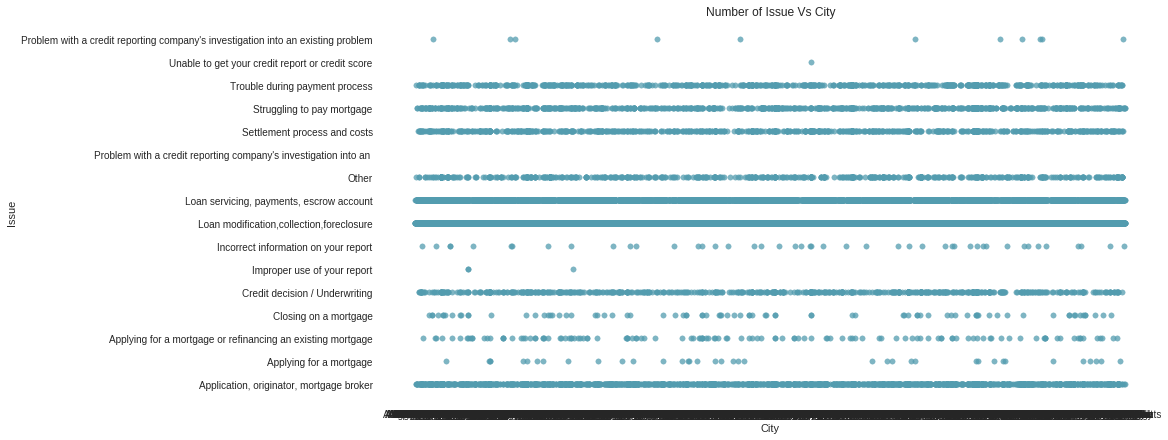

In [56]:
scatterplot(x_data = data_req_new['City']
            , y_data = data_req_new['Issue']
            , x_label = 'City'
            , y_label = 'Issue'
            , title = 'Number of Issue Vs City')